In [292]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



#######################################
### Generic gradient checker
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, 
                             epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. 
    And check whether gradient_func(X, y, theta) returned the true 
    gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO


def load_data():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('ridge_regression_dataset.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)
    
    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    return X_train, y_train, X_test, y_test



def print_train_test_errors_old(train_error_list, test_error_list,lambda_val):
    """
    depprecated function
    """
    message_1 = 'Average Training Error where lambda = ' + str(lambda_val) + ': '
    message_2 = str(round(np.mean(train_error_list),1))
    message_3 = '\nAverage Test Error where lambda = ' + str(lambda_val) + ': '
    message_4 = str(round(np.mean(test_error_list),1))
    final_message = message_1 + message_2 + message_3 + message_4
    print(final_message)

# Problem 4 Feature Normalization Function and validation

In the below cell, i define the function for Feature Normalization as described in the problem.

I will QA the function does what it is intended to do by:

        1. running the load data function, which calls our feature_normalization function
        
        2. evaluate the number of unique values in train and test set \
            success criteria: num_unique_values >= 2
            
        3. evaluate the range of values in train and test set 
            success criteria: all columns range from 0 to 1 in the train data set

In [2]:
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size(num_instances, num_features)
        test - test set, a 2D numpy array of size(num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    
    #implement constant feature value check on both train and test:
    train_normalized, test_normalized = [], []
    
    for feature_index in range(0,train.shape[1]):

        feature = train[:,feature_index]
        if len(np.unique(feature)) > 1:
            feature_min = np.min(feature)
            feature_max = np.max(feature)
            
            train[:,feature_index] = (train[:,feature_index] - feature_min)/(feature_max- feature_min)
            train_normalized.append(train[:,feature_index])
            
            test[:,feature_index] = (test[:,feature_index]-feature_min)/(feature_max- feature_min)
            test_normalized.append(test[:,feature_index])
            
    train_normalized = np.array(train_normalized).T
    test_normalized = np.array(test_normalized).T
    
    return(train_normalized, test_normalized)
            

In [3]:
X_train, y_train, X_test, y_test = load_data()

loading the dataset
Split into Train and Test
Scaling all to [0, 1]


In [4]:
#https://stackoverflow.com/questions/48473056/number-of-unique-elements-per-row-in-a-numpy-array
from toolz import compose

#code commented to reduce clutter during submission of notebook

cond1 = min(np.apply_along_axis(compose(len, np.unique), 0, X_train[:,0:48])) >= 2 

cond2 = min(np.apply_along_axis(compose(len, np.unique), 0, X_test[:,0:48])) >=2

cond1 + cond2

True

In [5]:
cond1 = max(X_train[0:48].max(axis=0)) == 1
cond2 = min(X_train[:,0:48].min(axis=0)) == 1

cond1 + cond2

True

## Problem 4 validation

Success criteria number 1 and 2 were met for all columns, except the last column which reflects our bias term and is a column of a singular value of 1.

This column is created after our feature normalization, so the function works to our expectaiton

# Problem 8

Complete the compute_square_loss function, done below

In [6]:
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D array of size(num_features)

    Returns:
        loss - the average square loss, scalar
    """
    num_rows = X.shape[0]
    y_hat = X@theta
    return(1/num_rows * sum((y_hat-y)**2))

# Problem 9

Complete the compute_square_loss_gradient function, done below

In [7]:
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss(as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #Calculate number of observations
    m = X.shape[0]
    #Calculate gradient using closed form solution from problem 6
    gradient = ((X.T @ X @ theta) - (X.T @ y)) * 2/m
    #Return gradient
    return(gradient)



# Problem 10

Complete the function grad_checker, done below 

In [8]:
#######################################
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
(e_1 =(1,0,0,...,0), e_2 =(0,1,0,...,0), ..., e_d =(0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
(J(theta + epsilon * e_i) - J(theta - epsilon * e_i)) /(2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    
    num_features = len(theta)
    
    temp_list = []
    identity = np.identity(len(theta))
    
    for i in range(len(theta)):
        first_part = compute_square_loss(X,y,theta+epsilon*identity[:,i])
        second_part = compute_square_loss(X,y,theta-epsilon*identity[:,i])
        
        answer = (first_part - second_part)/(2*epsilon)
        temp_list.append(answer)
        
    answer = np.array(temp_list)
    
    vector_distance = (true_gradient-answer)**2
    
    l2_distance = np.sqrt(np.sum(vector_distance))
    
    if l2_distance < tolerance:
        return(True)
        #return(True)
    else:
        return(False)

# Problem 11

Complete the function batch_gradient_descent, done below

In [9]:
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array,(num_step+1)
    """
    
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step + 1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_step + 1)  #Initialize loss_hist
    theta = np.zeros(num_features)  #Initialize theta
    
    for i in range(0,num_step):
        #Compute Gradient and Calculate and Append Loss
        temp_grad = compute_square_loss_gradient(X,y,theta)
        loss_hist[i] = compute_square_loss(X,y,theta)

        #Calculate and write new theta
        theta = theta - (alpha * temp_grad)
        theta_hist[i,:] = theta
    loss_hist[1000] = compute_square_loss(X,y,theta)
    #Return theta_hist, loss_hist    
    return theta_hist, loss_hist    

# Problem 12:

Run batch gradient descent, varying step sizes of .5, .1, .05 and .01

Plot average square loss on the training set as afunction of the number of steps for each learning rate

In [42]:
theta_hist_5, loss_hist_5 = batch_grad_descent(X_train,y_train, alpha =.5)
theta_hist_1, loss_hist_1 = batch_grad_descent(X_train,y_train, alpha =.1)
theta_hist_05, loss_hist_05 = batch_grad_descent(X_train,y_train, alpha =.05)
theta_hist_01, loss_hist_01 = batch_grad_descent(X_train,y_train, alpha =.01)

<ipython-input-6-160399dc77d2>:16: RuntimeWarning: overflow encountered in double_scalars
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-6-160399dc77d2>:16: RuntimeWarning: overflow encountered in square
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-7-58f67f47251f>:16: RuntimeWarning: overflow encountered in multiply
  gradient = ((X.T @ X @ theta) - (X.T @ y)) * 2/m
<ipython-input-6-160399dc77d2>:15: RuntimeWarning: invalid value encountered in matmul
  y_hat = X@theta
<ipython-input-9-c5439029b13f>:31: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha * temp_grad)
<ipython-input-7-58f67f47251f>:16: RuntimeWarning: overflow encountered in matmul
  gradient = ((X.T @ X @ theta) - (X.T @ y)) * 2/m


/Users/jobygeorge/opt/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:6845: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


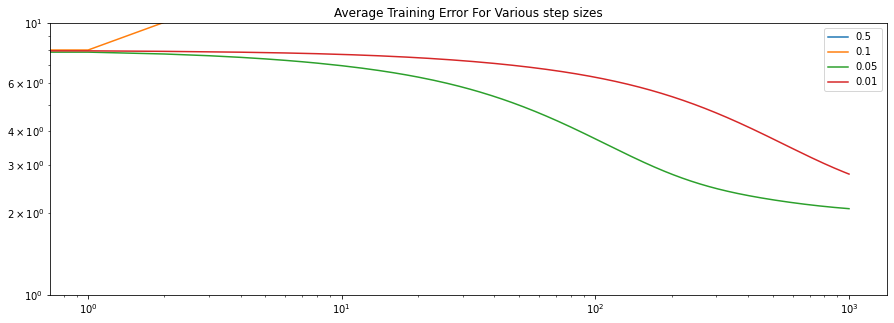

In [35]:
x_axis = list(range(1001))
#Begin plotting
plt.figure(figsize=(15, 5))
plt.plot(x_axis,loss_hist_5, label='0.5')
plt.plot(x_axis,loss_hist_1, label='0.1')
plt.plot(x_axis,loss_hist_05,label='0.05')
plt.plot(x_axis,loss_hist_01,label='0.01')


plt.xscale('log')
plt.yscale('log')
plt.title("Average Training Error For Various step sizes")
plt.legend()

Our functions diverge for large step sizes (.5, .1), and the training error quickly becomes infinite.

To see this clearly, I've plotted those two step sizes in their own graph

/Users/jobygeorge/opt/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:6845: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


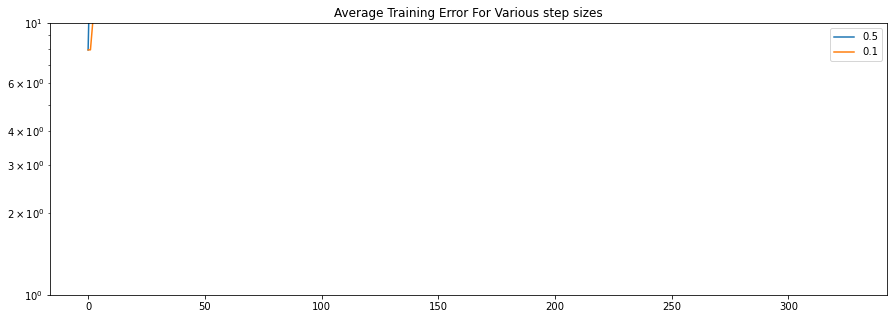

In [37]:
plt.figure(figsize=(15, 5))
plt.plot(x_axis,loss_hist_5, label='0.5')
plt.plot(x_axis,loss_hist_1, label='0.1')
plt.yscale('log')
plt.title("Average Training Error For Various step sizes")
plt.legend()

# Problem 13:

Plot the average test square loss for the above learning rates as a function of number of steps

In [43]:
#initialize lists to store loss on test dataset
loss_hist_test_5, loss_hist_test_1, loss_hist_test_05, loss_hist_test_01 = [], [], [],[]
x_axis = list(range(1000))

for i in range(1000):
    temp_theta_vals_5 = theta_hist_5[i,:]
    temp_theta_vals_1 = theta_hist_1[i,:] 
    temp_theta_vals_05 = theta_hist_05[i,:]
    temp_theta_vals_01 = theta_hist_01[i,:]
    
    loss_hist_test_5.append(compute_square_loss(X_test,y_test,temp_theta_vals_5))
    loss_hist_test_1.append(compute_square_loss(X_test,y_test,temp_theta_vals_1))
    loss_hist_test_05.append(compute_square_loss(X_test,y_test,temp_theta_vals_05))
    loss_hist_test_01.append(compute_square_loss(X_test,y_test,temp_theta_vals_01))


<ipython-input-6-160399dc77d2>:16: RuntimeWarning: overflow encountered in double_scalars
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-6-160399dc77d2>:16: RuntimeWarning: overflow encountered in square
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-6-160399dc77d2>:15: RuntimeWarning: invalid value encountered in matmul
  y_hat = X@theta


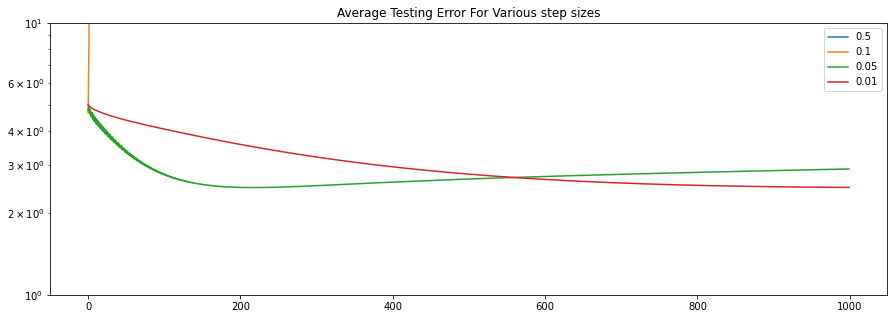

In [44]:
plt.figure(figsize=(15, 5))
plt.plot(x_axis,loss_hist_test_5, label='0.5')
plt.plot(x_axis,loss_hist_test_1, label='0.1')
plt.plot(x_axis,loss_hist_test_05, label='0.05')
plt.plot(x_axis,loss_hist_test_01, label='0.01')


plt.yscale('log')
plt.title("Average Testing Error For Various step sizes")
plt.legend()

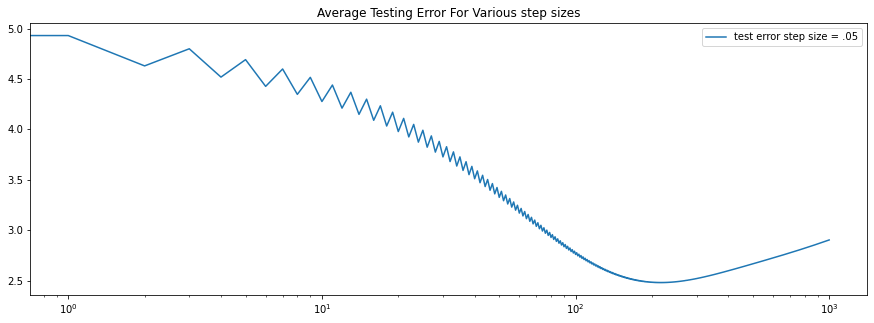

In [45]:
plt.figure(figsize=(15, 5))
plt.plot(x_axis,loss_hist_test_05, label='test error step size = .05')
#plt.plot(x_axis,loss_hist_05[0:1000], label='train error step size = .05')


plt.title("Average Testing Error For Various step sizes")
plt.xscale('log')
plt.legend()



# Problem 15

Complete compute_regularized_square_loss_gradient, done below

In [558]:
#######################################
### The gradient of regularized batch gradient descent

def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    m = X.shape[0]
    #create a checker to fix a shape problem that occurs for SGD
    gradient = (2/m)*((X.T @ X @ theta) - (X.T @ y)) + 2*lambda_reg*theta
    #Return gradient
    return(gradient)

# Problem 16
Complete regularized_grad_descent, done below

In [47]:
#######################################
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
  
    
    for i in range(0,num_step):
        #Compute Gradient and Calculate and Append Loss
        temp_grad = compute_regularized_square_loss_gradient(X,y,theta,lambda_reg)
        loss_hist[i] = compute_square_loss(X,y,theta)

        #Calculate and write new theta
        theta = theta - (alpha * temp_grad)
        theta_hist[i,:] = theta
        
    loss_hist[1000] = compute_square_loss(X,y,theta)
    #Return theta_hist, loss_hist    
    return theta_hist, loss_hist    

# Problem 17

Plot training error and testing error for various lambdas, as a function of num step sizes

In [259]:
lambda_list = [10e-7, 10e-5, 10e-3, .1, 1, 10,100]

theta_hist_7,  loss_hist_7 = regularized_grad_descent(X_train,y_train, alpha =.05, lambda_reg = lambda_list[0])
theta_hist_5,  loss_hist_5 = regularized_grad_descent(X_train,y_train, alpha =.05,  lambda_reg = lambda_list[1])
theta_hist_3,  loss_hist_3 = regularized_grad_descent(X_train,y_train, alpha =.05, lambda_reg = lambda_list[2])
theta_hist_01, loss_hist_01 = regularized_grad_descent(X_train,y_train, alpha =.05,  lambda_reg = lambda_list[3])
theta_hist_1,  loss_hist_1 = regularized_grad_descent(X_train,y_train, alpha =.05,  lambda_reg = lambda_list[4])
theta_hist_10, loss_hist_10 = regularized_grad_descent(X_train,y_train, alpha =.05,  lambda_reg = lambda_list[5])
theta_hist_100,loss_hist_100 = regularized_grad_descent(X_train,y_train, alpha =.05, lambda_reg = lambda_list[6])

<ipython-input-6-160399dc77d2>:16: RuntimeWarning: overflow encountered in double_scalars
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-6-160399dc77d2>:16: RuntimeWarning: overflow encountered in square
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-46-9cb4cdfe36b9>:19: RuntimeWarning: overflow encountered in matmul
  gradient = (2/m)*((X.T @ X @ theta) - (X.T @ y)) + 2*lambda_reg*theta
<ipython-input-46-9cb4cdfe36b9>:19: RuntimeWarning: overflow encountered in multiply
  gradient = (2/m)*((X.T @ X @ theta) - (X.T @ y)) + 2*lambda_reg*theta
<ipython-input-6-160399dc77d2>:15: RuntimeWarning: invalid value encountered in matmul
  y_hat = X@theta
<ipython-input-47-37f8788b25f6>:29: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha * temp_grad)


/Users/jobygeorge/opt/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:6845: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


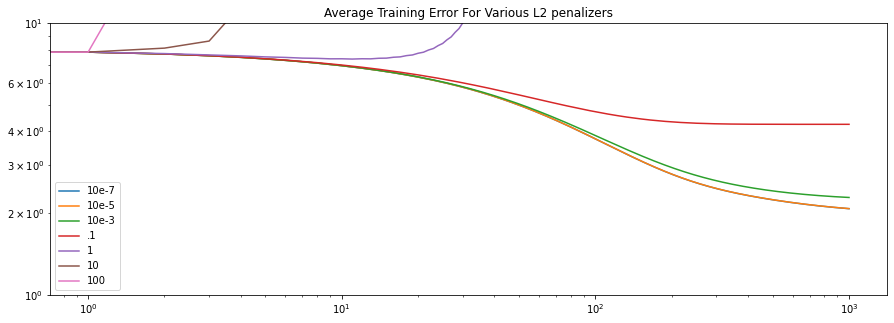

In [261]:
x = list(range(1001))
plt.figure(figsize=(15, 5))
plt.plot(x,loss_hist_7, label='10e-7')
plt.plot(x,loss_hist_5, label='10e-5')
plt.plot(x,loss_hist_3, label='10e-3')
plt.plot(x,loss_hist_01, label='.1')
plt.plot(x,loss_hist_1, label='1')
plt.plot(x,loss_hist_10, label='10')
plt.plot(x,loss_hist_100, label='100')

plt.xscale('log')
plt.yscale('log')
plt.title("Average Training Error For Various L2 penalizers")
plt.legend()

In [262]:
#initialize lists to store loss on test dataset
loss_hist_test_7, loss_hist_test_5, loss_hist_test_3, loss_hist_test_01 = [], [], [],[]
loss_hist_test_1, loss_hist_test_10, loss_hist_test_100 = [], [], []
x_axis = list(range(1000))

for i in range(1000):
    temp_theta_vals_7 = theta_hist_7[i,:]
    temp_theta_vals_5 = theta_hist_5[i,:] 
    temp_theta_vals_3 = theta_hist_3[i,:]
    temp_theta_vals_01 = theta_hist_01[i,:]
    temp_theta_vals_1 = theta_hist_1[i,:]
    temp_theta_vals_10 = theta_hist_10[i,:]
    temp_theta_vals_100 = theta_hist_100[i,:]




    
    loss_hist_test_7.append(compute_square_loss(X_test,y_test,temp_theta_vals_7))
    loss_hist_test_5.append(compute_square_loss(X_test,y_test,temp_theta_vals_5))
    loss_hist_test_3.append(compute_square_loss(X_test,y_test,temp_theta_vals_3))
    loss_hist_test_01.append(compute_square_loss(X_test,y_test,temp_theta_vals_01))
    loss_hist_test_1.append(compute_square_loss(X_test,y_test,temp_theta_vals_1))
    loss_hist_test_10.append(compute_square_loss(X_test,y_test,temp_theta_vals_10))
    loss_hist_test_100.append(compute_square_loss(X_test,y_test,temp_theta_vals_100))




<ipython-input-6-160399dc77d2>:16: RuntimeWarning: overflow encountered in double_scalars
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-6-160399dc77d2>:16: RuntimeWarning: overflow encountered in square
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-6-160399dc77d2>:15: RuntimeWarning: invalid value encountered in matmul
  y_hat = X@theta


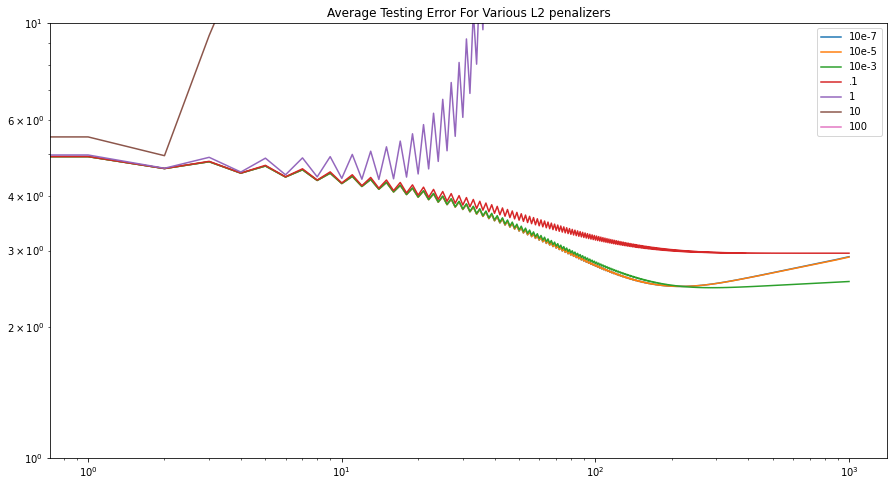

In [263]:
x = list(range(1000))
plt.figure(figsize=(15, 8))
plt.plot(x,loss_hist_test_7, label='10e-7')
plt.plot(x,loss_hist_test_5, label='10e-5')
plt.plot(x,loss_hist_test_3, label='10e-3')
plt.plot(x,loss_hist_test_01, label='.1')
plt.plot(x,loss_hist_test_1, label='1')
plt.plot(x,loss_hist_test_10, label='10')
plt.plot(x,loss_hist_test_100, label='100')

plt.xscale('log')
plt.yscale('log')
plt.title("Average Testing Error For Various L2 penalizers")
plt.legend()

# Problem 17 Answer:

We notice that ridge regression prevents overfitting on the test dataset as compared to non-regularized regression because of the penalty term

# Problem 18

Using the last set of theta values of the gradient descent with regularization for the various different lambda's, plot train and test error

In [293]:
def print_train_test_errors(train_error_list, test_error_list,lambda_val):
    """
    Args:
        train_error_list - a list corresponding to the training error of our \
        Ridge Regression function for a single lambda
        
        train_error_list - a list corresponding to the testing error of our \
        Ridge Regression function for a single lambda
        
        lambda_val - the lambda used for calculating the train and testing error of the previous inputs
    
    Returns:
        a message that specifies the mean square train and test error for a given lambda in
        the last iteration of our gradient descient algorithim
        
        final_train_error_list - the mean square train error for the last run of our gradient descent
        final_test_error_list hist - the mean square test error for the last run of our gradient descent.
    """
    final_train_error_list = []
    final_test_error_list = []
    message_1 = 'Average Training Error where lambda = ' + str(lambda_val) + ': '
    message_2 = str(round(train_error_list[-1],4))
    message_3 = '\nAverage Test Error where lambda = ' + str(lambda_val) + ': '
    message_4 = str(round(test_error_list[-1],4))
    final_message = message_1 + message_2 + message_3 + message_4
    final_train_error_list.append(train_error_list[-1])
    final_test_error_list.append(test_error_list[-1])
    print(final_message)
    return(final_train_error_list, final_test_error_list)


In [265]:
train_error_list = [loss_hist_7,loss_hist_5 ,loss_hist_3 ,loss_hist_01, loss_hist_1 ,loss_hist_10,
                    loss_hist_100]

test_err_list = [loss_hist_test_7, loss_hist_test_5, loss_hist_test_3, loss_hist_test_01,
                 loss_hist_test_1,
                 loss_hist_test_10,loss_hist_test_100]

plot_train_list = []
plot_test_list = []
for index in range(len(train_error_list)):
    temp1, temp2 =  print_train_test_errors(train_error_list[index],test_err_list[index], lambda_list[index])
    plot_train_list.append(temp1)
    plot_test_list.append(temp2)
    

Average Training Error where lambda = 1e-06: 2.0777
Average Test Error where lambda = 1e-06: 2.9034
Average Training Error where lambda = 0.0001: 2.079
Average Test Error where lambda = 0.0001: 2.8976
Average Training Error where lambda = 0.01: 2.2847
Average Test Error where lambda = 0.01: 2.5458
Average Training Error where lambda = 0.1: 4.2458
Average Test Error where lambda = 0.1: 2.9577
Average Training Error where lambda = 1: 2.4907665006410276e+64
Average Test Error where lambda = 1: 2.1057950195914032e+64
Average Training Error where lambda = 10: inf
Average Test Error where lambda = 10: inf
Average Training Error where lambda = 100: nan
Average Test Error where lambda = 100: nan


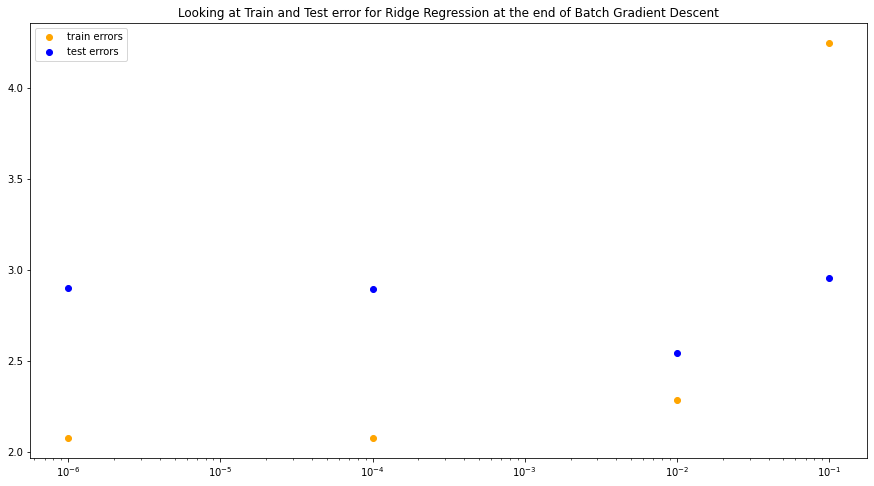

In [266]:
plt.figure(figsize=(15,8))
plt.scatter(lambda_list[0:4], plot_train_list[0:4], label = 'train errors', color = 'orange')
plt.scatter(lambda_list[0:4], plot_test_list[0:4], label = 'test errors', color = 'blue')
plt.xscale('log')
message = 'Looking at Train and Test error for Ridge Regression at the end of Batch Gradient Descent'
plt.title(message)
plt.legend()

# Problem 19:

Early stopping: plot the previous plot, with the optimal test error during the batch gradient descent iteration along with the test error from the last iteration of batch gardient descent 

In [300]:
def print_optimal_train_test_errors(train_error_list, test_error_list,lambda_val):
    """
    Args:
        train_error_list - a list corresponding to the training error of our \
        Ridge Regression function for a single lambda
        
        train_error_list - a list corresponding to the testing error of our \
        Ridge Regression function for a single lambda
        
        lambda_val - the lambda used for calculating the train and testing error of the previous inputs
    
    Returns:
        a message that specifies the mean square train and test error for a given lambda in
        the last iteration of our gradient descient algorithim
        
        final_train_error_list - the mean square train error for the optimal run of our gradient descent
        final_test_error_list hist - the mean square test error for the optimal run of our gradient descent.
    """
    final_train_error_list = []
    final_test_error_list = []
    message_1 = 'Average Training Error where lambda = ' + str(lambda_val) + ': '
    message_2 = str(round(min(train_error_list),4))
    message_3 = '\nAverage Test Error where lambda = ' + str(lambda_val) + ': '
    message_4 = str(round(min(test_error_list),4))
    final_message = message_1 + message_2 + message_3 + message_4
    final_train_error_list.append(min(train_error_list))
    final_test_error_list.append(min(test_error_list))
    print(final_message)
    return(final_train_error_list, final_test_error_list)



In [301]:
plot_optimal_train_list = []
plot_optimal_test_list = []
for index in range(0,len(train_error_list)):
    temp1, temp2 =  print_optimal_train_test_errors(train_error_list[index],test_err_list[index], lambda_list[index])
    plot_optimal_train_list.append(temp1)
    plot_optimal_test_list.append(temp2)
    

Average Training Error where lambda = 1e-06: 2.0777
Average Test Error where lambda = 1e-06: 2.48
Average Training Error where lambda = 0.0001: 2.079
Average Test Error where lambda = 0.0001: 2.4798
Average Training Error where lambda = 0.01: 2.2847
Average Test Error where lambda = 0.01: 2.4636
Average Training Error where lambda = 0.1: 4.2458
Average Test Error where lambda = 0.1: 2.9577
Average Training Error where lambda = 1: 7.38
Average Test Error where lambda = 1: 4.3711
Average Training Error where lambda = 10: 7.8265
Average Test Error where lambda = 10: 4.7715
Average Training Error where lambda = 100: 7.8265
Average Test Error where lambda = 100: 4.7715


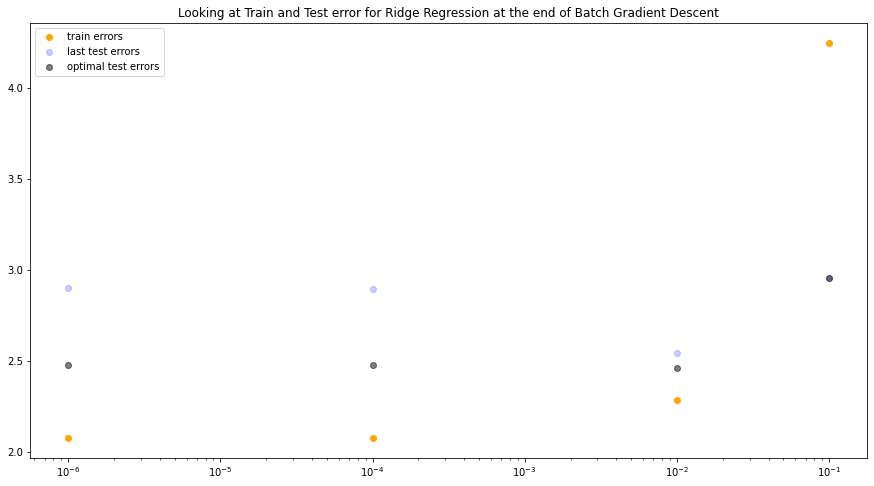

In [302]:
plt.figure(figsize=(15,8))
plt.scatter(lambda_list[0:4], plot_train_list[0:4], label = 'train errors', color = 'orange')
plt.scatter(lambda_list[0:4], plot_test_list[0:4], label = 'last test errors', color = 'blue', alpha = .2)
plt.scatter(lambda_list[0:4], plot_optimal_test_list[0:4], label = 'optimal test errors', color = 'black', alpha = .5)
plt.xscale('log')
message = 'Looking at Train and Test error for Ridge Regression at the end of Batch Gradient Descent'
plt.title(message)
plt.legend()



# Problem 20

We would choose the set of coefficients that provided the least test error. Which is...

# Problem 21

Show that our objective function:


$$J_{\lambda}(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left(h_{\theta}(x_{i})-y_{i}\right)^{2}+\lambda\theta^{T}\theta
\$$

can be written in the form $J_\lambda(\theta)=\frac{1}{m}\sum_{i=1}^{m}f_{i}(\theta)$
by giving an expression for $f_{i}(\theta)$ that makes the two expressions
equivalent.


If

$$f_i(\theta) =  \left(h_{\theta}(x_{i})-y_{i}\right)^{2}+\lambda\theta^{T}\theta$$ then 

$$J_{\lambda}(\theta) = \frac{1}{m}\sum_{i=1}^{m}f_{i}(\theta)$$

**Q.E.D**


# Problem 22

Show that the stochastic gradient $\nabla_\theta f_{i}(\theta)$, for $i$
chosen uniformly at random from $\{1,\ldots,m\}$, is an unbiased estimator of $\nabla_\theta J_\lambda(\theta)$. In other words, show that $\mathbb{E}\left[\nabla f_{i}(\theta)\right]=\nabla J_\lambda(\theta)$
for any $\theta$

## Step 1: calculate the gradient

of $f_{i}(\theta)$:

$$\nabla f_{i}(\theta) = \frac{2}{m} (X_i^TX_i\theta - X^T_iy_i) + 2\lambda \theta$$


## Step 2: plug in m = 1 for SGD

$$\nabla f_{i}(\theta) = 2(X_i^TX_i\theta - X_i^Ty_i) + 2\lambda \theta$$

## Step 3: apply expected value 

$$\mathbb{E}[\nabla f_{i}(\theta)] = E[2(X_i^TX_i\theta - X_i^Ty_i) + 2\lambda \theta]$$


## Given  a sample size of one


the expected value of $$2(X_i^TX_i\theta - X_i^Ty_i) $$


$$ = 2(X_i^TX_i\theta - X_i^Ty_i) * P(X_i = i)$$


Therefore giving us: 
$$\mathbb{E}[\nabla f_{i}(\theta)] = 2(X_i^TX_i\theta - X_i^Ty_i) * P(X_i = i) + 2\lambda \theta$$

Since the probability of any selecting any individual value of X is $\frac{1}{m}$ we get

$$\mathbb{E}[\nabla f_{i}(\theta)] = \frac{2}{m}(X_i^TX_i\theta - X_i^Ty_i) + 2\lambda \theta $$

$$ = \frac{2}{m}(X_i^TX_i\theta - X_i^Ty_i) + 2\lambda \theta = \nabla J_\lambda(\theta)$$ 

therefore 

$$\mathbb{E}[\nabla f_{i}(\theta)] = \nabla J_\lambda(\theta)$$ 

**Q.E.D**

# Problem 23

Write down the update rule for $\theta$ in SGD for the ridge regression objective function

$$\theta_{i+1} = \theta_i - 2\eta[(X^T_j\theta_i - y_j)x_j + \lambda\theta$$

where **j** is a randomly selected row and corresponding target from our matrix X $\in$ $R^{mxd}$ and target vectory y $\in$ $R^{m}$

**i** is the iteration number in the stochastic descent algorithim

and $\eta$ is the step size in our stochastic descent algorithim

# Problem 24

Implement stochastic_grad_descent, done below

In [549]:
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000, eta0=False):
    """
    In this question you will implement stochastic gradient descent with regularization term
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set
    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    #TODO
    # Set step counter
    step_size_p = 1
    
    np.random.seed(10)
    for i in range(num_epoch):
        # Shuffle points
        shuffle = np.random.permutation(num_instances)

        for j in shuffle:
            # Store the historical theta
            theta_hist[i, j] = theta
            loss_hist[i, j] = compute_square_loss(X, y, theta) + np.sum(theta**2)*lambda_reg

            # Simultaneously update theta
            grad = 2*(np.dot(X[j], theta.T) - y[j])*X[j] + 2*lambda_reg*theta #Compute gradient of one single point
            
            else: 
                if isinstance(alpha, str):
                    if alpha == "1/t":
                        theta = theta - 0.1/step_size_p * grad #Update theta
                    elif alpha == "1/sqrt(t)":
                        theta = theta - 0.1/np.sqrt(step_size_p) * grad #Update theta
                    step_size_p+=1
                else:
                    theta = theta - alpha * grad #Update theta

    return theta_hist, loss_hist

# Problem 25:

Graph the objective function for stochastic gradient descent on ridge regression for $\alpha$ = .1, $\alpha$ = .05, $\alpha$ = .005 and a varying $\alpha$, commenting on the difference in converge rates and error rates

In [555]:
sgd_theta_hist_01, sgd_loss_hist_01 = stochastic_grad_descent(X_train,y_train, alpha = .01)
#sgd_theta_hist_05, sgd_loss_hist_05 = stochastic_grad_descent(X_train,y_train, alpha = .05)
sgd_theta_hist_005, sgd_loss_hist_005 = stochastic_grad_descent(X_train,y_train, alpha = .005)
sgd_theta_hist_sqrt, sgd_loss_hist_sqrt = stochastic_grad_descent(X_train,y_train, alpha = "1/sqrt(t)")
sgd_theta_hist_t, sgd_loss_hist_t = stochastic_grad_descent(X_train,y_train, alpha = "1/t")

<ipython-input-6-160399dc77d2>:16: RuntimeWarning: overflow encountered in double_scalars
  return(1/num_rows * sum((y_hat-y)**2))
<ipython-input-6-160399dc77d2>:16: RuntimeWarning: overflow encountered in square
  return(1/num_rows * sum((y_hat-y)**2))
/Users/jobygeorge/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-549-468bfe0c186c>:36: RuntimeWarning: overflow encountered in square
  loss_hist[i, j] = compute_square_loss(X, y, theta) + np.sum(theta**2)*lambda_reg
<ipython-input-6-160399dc77d2>:15: RuntimeWarning: overflow encountered in matmul
  y_hat = X@theta
<ipython-input-549-468bfe0c186c>:39: RuntimeWarning: invalid value encountered in multiply
  grad = 2*(np.dot(X[j], theta.T) - y[j])*X[j] + 2*lambda_reg*theta #Compute gradient of one single point
<ipython-input-6-160399dc77d2>:15: RuntimeWarning: invalid value encountered in matmul

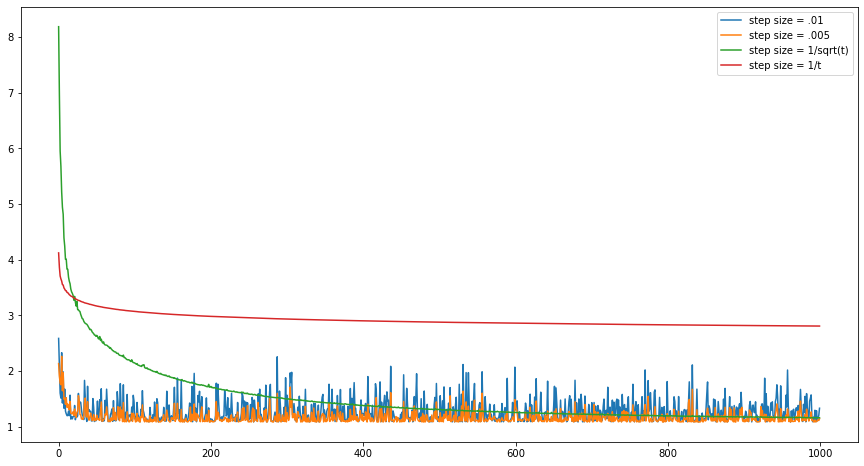

In [557]:
fig = plt.figure(figsize=(15,8))
plt.plot(np.log(sgd_loss_hist_01[:,-1]), label = 'step size = .01')
plt.plot(np.log(sgd_loss_hist_005[:,-1]), label = 'step size = .005')
#plt.plot(np.log(sgd_loss_hist_05[:,-1]), label = 'step size = .05') causes graph to lose meaning
plt.plot(np.log(sgd_loss_hist_sqrt[:,-1]), label = 'step size = 1/sqrt(t)')
plt.plot(np.log(sgd_loss_hist_t[:,-1]), label = 'step size = 1/t')



plt.legend()

# Problem 25 commentary

We observe a divergence with the constant step sizes, even if they start closer, the next iteration of the process usually results in increased error.

Furthermore with a constant step size of .05, which was not plotted, the error rose so quickly, that the axis was distorted and the graph above was not clearly interpretable. 

We notice that the stochastic gradient descent algorithim never reaches a great log error in 1000 epochs using a step size of $\frac{1}{t}$ but the step size of $\frac{1}{\sqrt{t}}$ does indeed converge to a minimal log error

# Problem 26